**Reading in the data and reshaping**

In [738]:
#read in the data
import pandas as pd
cat=pd.read_csv('categories.csv')
full=pd.read_csv('raw.csv')

In [739]:
#Reshape to be country x variable
reshaped_data=full.pivot(columns='indicator_label_standard',index='COUNTRY_CODE',values='value')

In [740]:
#a quick look at it
import numpy as np
np.shape(reshaped_data)

(48, 29)

In [741]:
np.shape(reshaped_data)

(48, 29)

In [742]:
#The 48 SSA countries
reshaped_data.index

Index(['AGO', 'BDI', 'BEN', 'BFA', 'BWA', 'CAF', 'CIV', 'CMR', 'COD', 'COG',
       'COM', 'CPV', 'DJI', 'ERI', 'ETH', 'GAB', 'GHA', 'GIN', 'GMB', 'GNB',
       'GNQ', 'KEN', 'LBR', 'LSO', 'MDG', 'MLI', 'MOZ', 'MRT', 'MUS', 'MWI',
       'NAM', 'NER', 'NGA', 'RWA', 'SEN', 'SLE', 'SOM', 'SSD', 'STP', 'SWZ',
       'SYC', 'TCD', 'TGO', 'TZA', 'UGA', 'ZAF', 'ZMB', 'ZWE'],
      dtype='object', name='COUNTRY_CODE')

In [751]:
#how many variables were replaced with 0
np.sum(np.sum(reshaped_data==0))/np.size(reshaped_data.values)

0.05531609195402299

In [693]:
#check a correlation between two variables
from scipy.stats import pearsonr
pearsonr(reshaped_data['Hospital beds 100 000 popn'],reshaped_data['Hospitals per 100 000 popn'])

(0.6033057603062582, 5.661091981973712e-06)

In [694]:
#subset for two other PCAs
catE=np.array(cat['indicator_label_standard'][cat['category']=='E_access_to_care'])
catB=np.array(cat['indicator_label_standard'][cat['category']=='B_comorbidity'])

In [695]:
reshaped_dataE=reshaped_data[catE]
reshaped_dataB=reshaped_data[catB]

**Working on the PCA implementation**

In [696]:
import numpy as np
from sklearn.decomposition import PCA

In [697]:
#center the data first
from sklearn import preprocessing
data=reshaped_data.values
data_centered=preprocessing.scale(data)

dataE=reshaped_dataE.values
data_centeredE=preprocessing.scale(dataE)

dataB=reshaped_dataB.values
data_centeredB=preprocessing.scale(dataB)

In [698]:
#perform PCA
pca=PCA()
pca.fit(data_centered)
PCA_data=pca.transform(data_centered)

pcaE=PCA()
pcaE.fit(data_centeredE)
PCA_dataE=pcaE.transform(data_centeredE)

pcaB=PCA()
pcaB.fit(data_centeredB)
PCA_dataB=pcaB.transform(data_centeredB)

In [699]:
#get the cumulative variance explained
cum_variance=np.cumsum(pca.explained_variance_ratio_)
comps=np.arange(1,30)

In [700]:
cum_varianceE=np.cumsum(pcaE.explained_variance_ratio_)
compsE=np.arange(1,9)

In [701]:
cum_varianceB=np.cumsum(pcaB.explained_variance_ratio_)
compsB=np.arange(1,15)

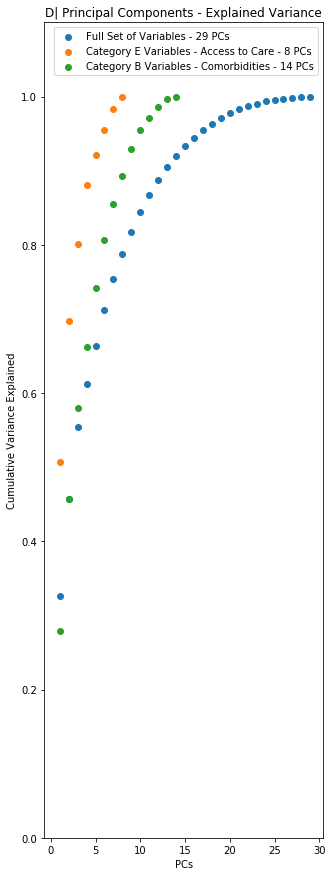

In [702]:
#scree plot
import matplotlib.pyplot as plt
plt.figure(figsize=(5,15))
plt.scatter(comps,cum_variance,label='Full Set of Variables - 29 PCs')
plt.scatter(compsE,cum_varianceE,label='Category E Variables - Access to Care - 8 PCs')
plt.scatter(compsB,cum_varianceB,label='Category B Variables - Comorbidities - 14 PCs')
plt.legend()
plt.ylim([0,1.1])
plt.xlabel('PCs')
plt.ylabel('Cumulative Variance Explained')
plt.title('D| Principal Components - Explained Variance')
plt.savefig('S4D.jpg',dpi=1200)

In [703]:
#We need 13/29 PCs to explain 90% of the variance
np.sum((cum_variance>.90)==0)+1

13

In [704]:
#We need 5/8 PCs to explain 90% of the variance
np.sum((cum_varianceE>.90)==0)+1

5

In [705]:
#We need 9/14 PCs to explain 90% of the variance
np.sum((cum_varianceB>.90)==0)+1

9

In [706]:
#2 PCs explain 46% of the variance in the data
cum_variance[1]

0.4574677637547483

In [707]:
#first PC only
cum_variance[0]

0.32583000060492334

In [708]:
#2 PCs explain 70% of the variance in the data
cum_varianceE[1]

0.6978481264461107

In [736]:
#first PC only
cum_varianceE[0]

0.5066375664836581

In [709]:
#2 PCs explain 46% of the variance in the data
cum_varianceB[1]

0.45733176497409217

In [737]:
#first PC only
cum_varianceB[0]

0.2793847719037261

In [710]:
#First two principal components
PC1=PCA_data[:,0]
PC2=PCA_data[:,1]

**COVID Testing Data**

In [711]:
#add a column to document the country name in the original data
reshaped_data['Code']=reshaped_data.index

In [712]:
testing=pd.read_csv('Testing.csv')

In [713]:
testing=testing[['Country Code','Tests Per 100k']]

In [714]:
full=testing.merge(reshaped_data,how='right',left_on='Country Code',right_on='Code')

In [715]:
#sort by code so in same order as the PCs
full=full.sort_values('Code')

In [716]:
tests=full['Tests Per 100k']

In [717]:
tests=np.array(np.log10(tests))

In [718]:
from scipy.stats import pearsonr
pearsonr(PC1,tests)

(0.6794026692619964, 1.1008071627495906e-07)

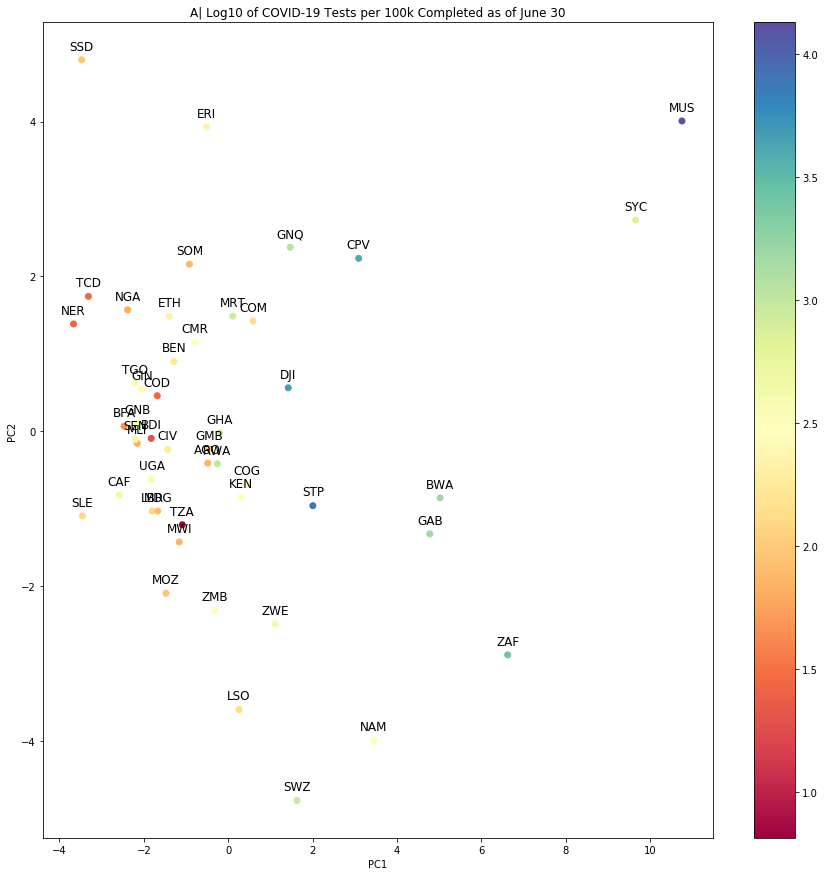

In [719]:
plt.figure(figsize=(15,15))
plt.scatter(PC1,PC2,c=tests,cmap='Spectral')
plt.colorbar()
ind=0
labels=np.array(full['Code'])
for x,y in zip(PC1,PC2):

    label = labels[ind]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',fontsize=12) # horizontal alignment can be left, right or center

    ind=ind+1
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A| Log10 of COVID-19 Tests per 100k Completed as of June 30')
plt.savefig('S4A.jpg',dpi=1200)

**GDP Data**

In [720]:
GDP=pd.read_csv('GDP.csv')
#replace the GDP for countries without 2019 data
#13 - ERI, 36 - SOM,37 - SSD 
GDP.iloc[67,GDP.columns.get_loc('2019')] = float(GDP[GDP['Country Code']=='ERI']['2011'])
GDP.iloc[214,GDP.columns.get_loc('2019')] = float(GDP[GDP['Country Code']=='SSD']['2015'])
GDP.iloc[211,GDP.columns.get_loc('2019')] = float(GDP[GDP['Country Code']=='SOM']['1990'])

In [721]:
GDP=GDP[['Country Code','2019']]

In [722]:
full1=GDP.merge(reshaped_data,how='right',left_on='Country Code',right_on='Code')

In [723]:
full1=full1.sort_values('Code')

In [724]:
g=full1['2019']
g=np.array(np.log10(g))

In [725]:
pearsonr(PC1,g)

(0.8038671910410649, 6.019378158770944e-12)

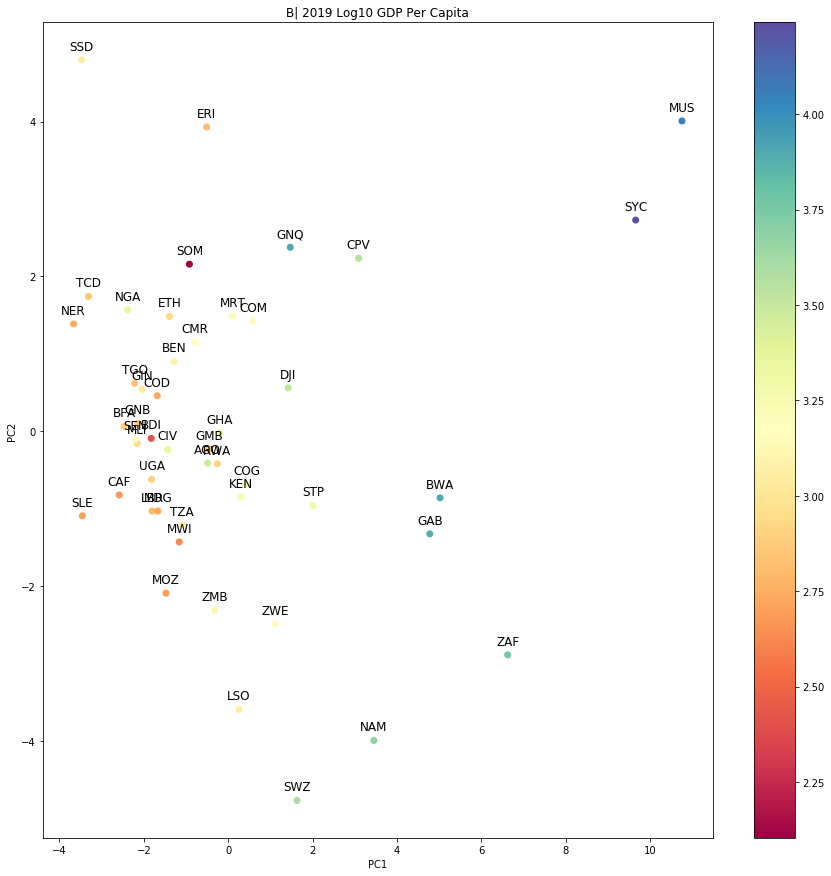

In [726]:
plt.figure(figsize=(15,15))
plt.scatter(PC1,PC2,c=g,cmap='Spectral')
plt.colorbar()
ind=0
labels=np.array(full1['Code'])
for x,y in zip(PC1,PC2):

    label = labels[ind]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',fontsize=12) # horizontal alignment can be left, right or center

    ind=ind+1
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('B| 2019 Log10 GDP Per Capita')
plt.savefig('S4B.jpg',dpi=1200)

**GINI**

In [727]:
GINI=pd.read_csv('GINI.csv')


In [728]:
#fill in the GINI
GINI['recent'] = GINI.apply(
    lambda row: row['2019'] if np.isnan(row['2018']) else row['2018'],
    axis=1)
for n in range(0,58):
    GINI['recent'] = GINI.apply(
        lambda row: row[str(2017-n)] if np.isnan(row['recent']) else row['recent'],
        axis=1)
    


In [729]:
GINI=GINI[['Country Code','recent']]

In [730]:
full2=GINI.merge(reshaped_data,how='right',left_on='Country Code',right_on='Code')

In [731]:
#sort so in the same order as PCs, and add in the PCs (have to be in same dataframe because dropping 3 of the 48 with no GINI data)
full2=full2.sort_values('Code')
full2['PC1']=PC1
full2['PC2']=PC2

In [732]:
#Drop the three countries without GINI data
full2=full2.dropna()

In [733]:
gn=full2['recent']
gn=np.array(np.log10(gn))

In [734]:
pearsonr(full2['PC2'],gn)

(-0.41877014132325147, 0.004196192763516303)

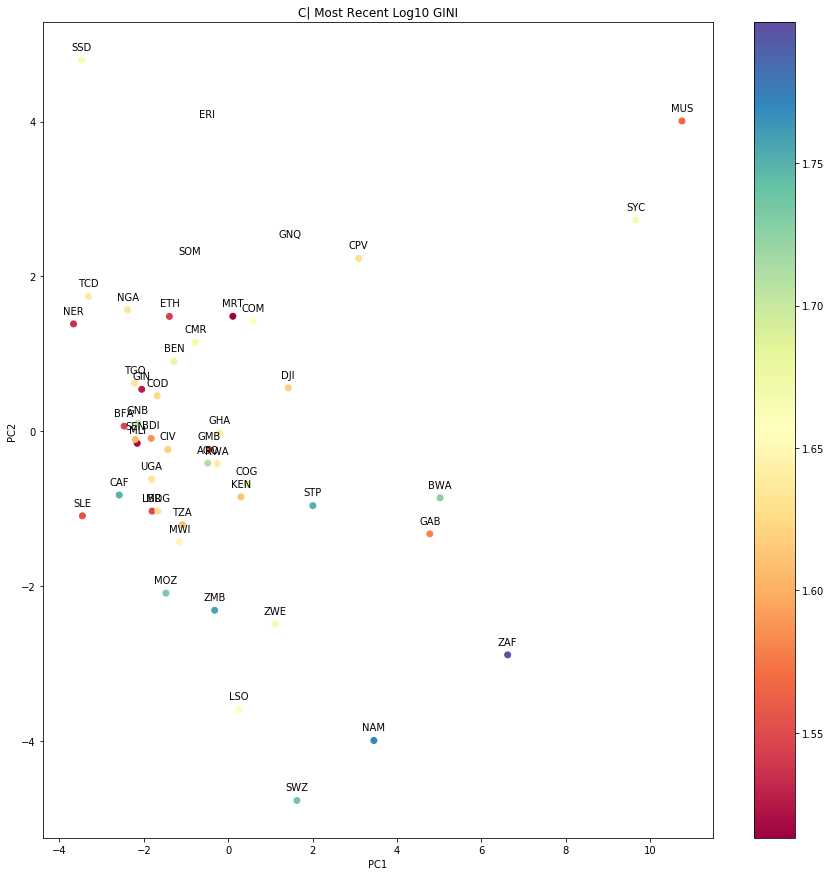

In [735]:
plt.figure(figsize=(15,15))
plt.scatter(full2['PC1'],full2['PC2'],c=gn,cmap='Spectral')
plt.colorbar()
ind=0
labels=np.array(full1['Code'])
for x,y in zip(PC1,PC2):

    label = labels[ind]
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

    ind=ind+1
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('C| Most Recent Log10 GINI')
plt.savefig('S4C.jpg',dpi=1200)